## Loading the Data

In [12]:
import pandas as pd

customers = pd.read_csv('customers.csv')
items = pd.read_csv('calvinklein_com.csv')

## Data Cleaning - Customer Segmentation

In [13]:
customers.head()

,Gender,Region,Age Group,Tops,Bottoms,Shoes,Headwear,Accessories
0,Male,3,4,12669,9656,7561,214,2674
1,Male,3,4,7057,9810,9568,1762,3293
2,Male,3,5,6353,8808,7684,2405,3516
3,Female,3,4,13265,1196,4221,6404,507
4,Male,3,5,22615,5410,7198,3915,1777


In [14]:
genderDict = {'Male':0,'Female':1}
customers['Gender'] = customers['Gender'].map(genderDict)

customers.head()

,Gender,Region,Age Group,Tops,Bottoms,Shoes,Headwear,Accessories
0,0,3,4,12669,9656,7561,214,2674
1,0,3,4,7057,9810,9568,1762,3293
2,0,3,5,6353,8808,7684,2405,3516
3,1,3,4,13265,1196,4221,6404,507
4,0,3,5,22615,5410,7198,3915,1777


## Customer Segmentation

In [15]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import scale
from numpy import random, float

clustering_data = customers[['Gender','Region','Age Group','Tops','Bottoms','Shoes','Headwear','Accessories']]

model = KMeans(n_clusters = 3)
model = model.fit(clustering_data) 
labels = model.labels_
centers= model.cluster_centers_
print('Number of clusters: ',len(model.cluster_centers_))
print(model.inertia_)
print('Silhouette Coefficient: ' + str(round(metrics.silhouette_score(customers, labels, metric='euclidean'),4)*100)+'%')

Number of clusters:  3
77056469237.6
Silhouette Coefficient: 48.1%


In [16]:
centers = centers.tolist()

In [17]:
centersDF = pd.DataFrame(data = centers)
centersDF.columns = ['Gender','Region','Age Group','Tops','Bottoms','Shoes','Headwear','Accessories']

In [18]:
centersDF.head()

,Gender,Region,Age Group,Tops,Bottoms,Shoes,Headwear,Accessories
0,0.739394,2.554545,2.772727,8253.469697,3824.60303,5280.454545,2572.660606,1773.057576
1,0.866667,2.566667,3.800000,35941.400000,6044.45000,6288.616667,6713.966667,1039.666667
2,0.040000,2.440000,3.540000,8000.040000,18511.42000,27573.900000,1996.680000,12407.360000


In [19]:
customers['Cluster'] = labels
customers.head()

,Gender,Region,Age Group,Tops,Bottoms,Shoes,Headwear,Accessories,Cluster
0,0,3,4,12669,9656,7561,214,2674,0
1,0,3,4,7057,9810,9568,1762,3293,0
2,0,3,5,6353,8808,7684,2405,3516,0
3,1,3,4,13265,1196,4221,6404,507,0
4,0,3,5,22615,5410,7198,3915,1777,1


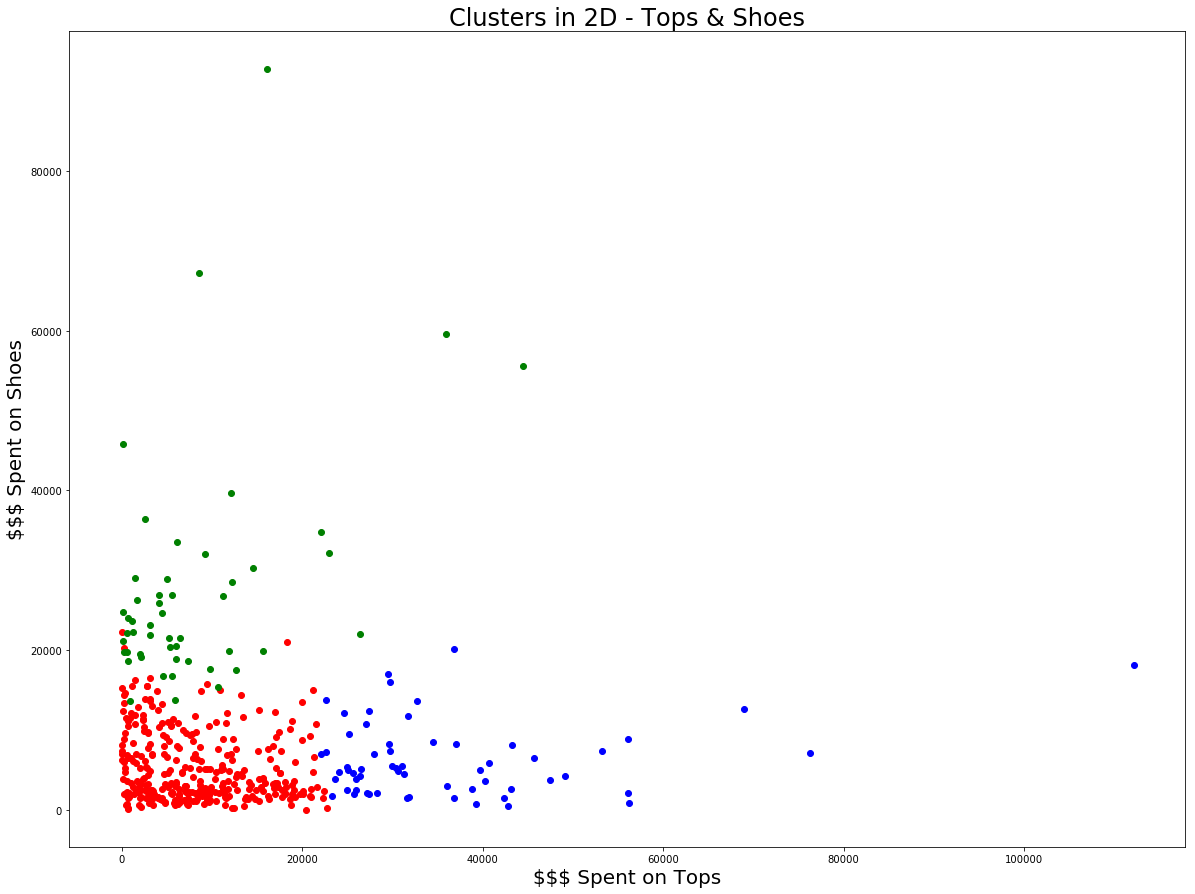

In [91]:
import matplotlib.pyplot as plt
import numpy as np

cluster_0 = customers[customers['Cluster']==0]
cluster_1 = customers[customers['Cluster']==1]
cluster_2 = customers[customers['Cluster']==2]

plt.figure(figsize=(20,15))
plt.scatter(cluster_0['Tops'],cluster_0['Shoes'],color = 'r')
plt.scatter(cluster_1['Tops'],cluster_1['Shoes'],color = 'b')
plt.scatter(cluster_2['Tops'],cluster_2['Shoes'],color = 'g')
plt.xlabel('$$$ Spent on Tops',fontsize = 20)
plt.ylabel('$$$ Spent on Shoes',fontsize = 20)
plt.title('Clusters in 2D - Tops & Shoes',fontsize = 24)
plt.show()

## Recommendation System - Data Cleaning

In [51]:
items = items.drop_duplicates(subset='product_name', keep="first")
items.head()

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,logo cotton stretch thong,$13.00,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,NaN,NaN,"[""cotton stretch thong panty"",""metallic elasti...","s,m,l","s,m,l",BLACK
4,essentials thong,$13.00,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,the essentials thong features a semi sheer pat...,NaN,NaN,"[""semi sheer thong panty"",""thin elastic logo w...","s,m,l","s,m,l",EPHEMERAL WITH IVORY LACE & LOGO
7,3 pack liner socks,$18.00,$18.00,http://www.calvinklein.us/en/womens-clothing/i...,Calvin Klein,Socks,Calvin Klein US,soft liner socks in a 3-pack featuring a no-sh...,NaN,NaN,"[""cotton stretch liner socks"",""no-show style"",...","xs-s,s-m,m-l","xs-s,m-l",BLACK
10,pure seamless thong,$13.00,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,a seamless style with contrasting print logo o...,NaN,NaN,"[""seamless thong"",""no-show fabric"",""contrast p...","s,m,l","s,m,l",BLACK
17,bare lace allover bralette,$24.00,$24.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Bras,Calvin Klein US,a bare lace bralette designed with nylon fabri...,NaN,NaN,"[""bare lace allover bralette"",""nylon fabric + ...","XS,s,m,l,xl","XS,s,m,l,xl",BLACK


In [20]:
items['mrp'] = items['mrp'].str.replace('$','')
items['mrp'] = items['mrp'].map(lambda x: float(x))

items.head()

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,logo cotton stretch thong,13.0,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,NaN,NaN,"[""cotton stretch thong panty"",""metallic elasti...","s,m,l","s,m,l",BLACK
1,logo cotton stretch thong,13.0,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,NaN,NaN,"[""cotton stretch thong panty"",""metallic elasti...","s,m,l","s,m,l",ASHFORD GREY
2,logo cotton stretch thong,13.0,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,NaN,NaN,"[""cotton stretch thong panty"",""metallic elasti...","s,m,l","s,m,l",WHITE
3,logo cotton stretch thong,13.0,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,NaN,NaN,"[""cotton stretch thong panty"",""metallic elasti...","s,m,l","s,m,l",NAVY
4,essentials thong,13.0,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,the essentials thong features a semi sheer pat...,NaN,NaN,"[""semi sheer thong panty"",""thin elastic logo w...","s,m,l","s,m,l",EPHEMERAL WITH IVORY LACE & LOGO


In [21]:
itemsPrep = items[['mrp','style_attributes']]
itemsPrep.head()

,mrp,style_attributes
0,13.0,"[""cotton stretch thong panty"",""metallic elasti..."
1,13.0,"[""cotton stretch thong panty"",""metallic elasti..."
2,13.0,"[""cotton stretch thong panty"",""metallic elasti..."
3,13.0,"[""cotton stretch thong panty"",""metallic elasti..."
4,13.0,"[""semi sheer thong panty"",""thin elastic logo w..."


In [22]:
styleList = list(itemsPrep['style_attributes'])

In [23]:
stylesMaster = []

for i in styleList:
    i=i.replace('[','')
    i=i.replace(']','')
    stylesMaster.append(i.split(','))    

stylesUn = []
for i in stylesMaster:
    for j in i:
        if j not in stylesUn:
            stylesUn.append(j)

stylesDict={}
count = 0
for style in stylesUn:
    stylesDict[style]=count
    count+=1    


In [24]:
bigStyles = []

for i in stylesMaster:
    stLs = []
    for key, value in stylesDict.items():
        
        if key in i:
            stLs.append(1)
        else:
            stLs.append(0)
    bigStyles.append(stLs)
        

In [25]:
itemsPrep['style_norm'] = bigStyles

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
itemsPrep = itemsPrep.drop('style_attributes',axis=1,inplace=False)

mrpmin = itemsPrep['mrp'].min()
mrpmax = itemsPrep['mrp'].max()
mrpRange = mrpmax-mrpmin

itemsPrep['mrp'] = itemsPrep['mrp'].map(lambda x : ((x-mrpmin)/mrpRange))

In [29]:
knn_final = itemsPrep.to_dict(orient='records')
print(knn_final[1])

{'mrp': 0.016666666666666666, 'style_norm': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [30]:
from scipy import spatial

def cosDistance(a, b):
    styleA = knn_final[a]['style_norm']
    styleB = knn_final[b]['style_norm']
    styleDistance = spatial.distance.cosine(styleA, styleB)
    priceA = knn_final[a]['mrp']
    priceB = knn_final[b]['mrp']
    priceDistance = abs(priceA - priceB)
    return styleDistance + priceDistance

cosDistance(24, 11)

0.74802368466051528

In [32]:
print(items.iloc[24])
print('\n')
print(items.iloc[11])

product_name                                         invisibles thong
mrp                                                                13
price                                                         $13.00 
pdp_url             http://www.calvinklein.us/en/womens-clothing/w...
brand_name                                               Calvin Klein
product_category                                              Panties
retailer                                              Calvin Klein US
description         an invisibles thong featuring a streamlined de...
rating                                                            NaN
review_count                                                      NaN
style_attributes    ["laser cut invisibles thong panty","ultra sil...
total_sizes                                                     s,m,l
available_size                                                    s,m
color                                           PETITE CRESCENT PRINT
Name: 24, dtype: obj

In [33]:
import operator

def getNeighbors(idx, K):
    distances = []
    for i in range(0,len(knn_final)):
        if idx != i and knn_final[idx]['mrp']!=knn_final[i]['mrp'] and knn_final[idx]['style_norm']!=knn_final[i]['style_norm']:
            dist = cosDistance(idx,i)
            if (dist != 0):
                distances.append((i, dist))
        else:
            continue
    distances.sort(key=operator.itemgetter(1))
    for i in range(0,len(distances)):
        try:
            if (knn_final[i]['style_norm'] == knn_final[i+1]['style_norm']):  
                del distances[i+1]
            elif knn_final[i]['style_norm'] == knn_final[i+2]['style_norm']:
                del distances[i+2]
            elif knn_final[i]['style_norm'] == knn_final[i+3]['style_norm']:
                del distances[i+3]
            elif knn_final[i]['style_norm'] == knn_final[i+4]['style_norm']:    
                del distances[i+4]
        except:
            continue
    neighbors = []
    neighbors.append(distances)
    return neighbors

K = 6
neighbors = getNeighbors(2, K)



# print(neighbors[0][0])
idexes = []
for i in range(1,K+1):
    idexes.append(neighbors[0][i][0])
# print(neighbors[0][0][0])

In [67]:
for i in idexes:
    print(items['product_name'].iloc[i])
    print(items['mrp'].iloc[i])
    print(items['style_attributes'].iloc[i])
    print('\n')

modern cotton bikini
20.0
["cotton bikini panty","wide elasticized logo waistband","full rear coverage","full cotton gusset","tagless","machine wash","53% cotton 35% modal 12% elastane","imported"]


ck id thin waistband string bikini
20.0
["ck id thin waistband string bikini","bikini silhouette","thin logo band","full gusset","rear coverage","machine wash","95% cotton 5% spandex","imported"]


modern cotton short
22.0
["cotton short panty","wide elasticized logo waistband","full cotton gusset","tagless","machine wash","53% cotton 35% modal 12% elastane","imported"]


ck id wide waistband tanga
22.0
["calvin klein id wide waistband tanga","cheeky silhouette","logo band","seaming details","machine wash","95% cotton 5% spandex","imported"]


sheer marquisette thong
22.0
["sheer marquisette thong","supersoft lightweight sheer","revisiting the original sheer marquisette logo","string thong silhouette","machine wash","72% nylon 28% elastane","imported"]


signature bikini
20.0
["signature b